In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# crypto = 'crypto_bitcoin'
crypto = 'crypto_ethereum'
# crypto = 'crypto_xrp'

In [3]:
c = 'XRP'

In [4]:
# list_subs = ['bitcoin','bitcoinbeginners','bitcoinmarkets','bitcoinmining','btc']
list_subs = ['ethereum','ethermining','ethfinance','eth','ethtrader']
# list_subs = ['xrp','ripple']

In [5]:
dfs = []
for subreddit in list_subs:
    dfs.append(pd.read_csv(f'Data/Sentiment/{crypto}/VADER/{subreddit}_submission_vader_sentiment.csv'))
    
vader_df = pd.concat(dfs)
vader_df['subreddit'].unique()

array(['ethereum', 'ethermining', 'ethfinance', 'eth', 'ethtrader'],
      dtype=object)

In [6]:
vader_df

submission           author  num_comments                shortlink  \
0        rt6w3y  economicsdesign            10   https://redd.it/rt6w3y   
1        rt7z5b        JoeDrater            12   https://redd.it/rt7z5b   
2        rte7xj    Ok_Guide_7500            19   https://redd.it/rte7xj   
3        rtj9b1   Ye_Olde_Dragon            31   https://redd.it/rtj9b1   
4        rtjq19          tab87vn            16   https://redd.it/rtjq19   
...         ...              ...           ...                      ...   
5021     zyqkfi    Bhallaladevaa             3   https://redd.it/zyqkfi   
5022     zzoza9    Visible-Ad743           105   https://redd.it/zzoza9   
5023     zzxv2c    mvnnyvevwofrb             5   https://redd.it/zzxv2c   
5024    1000re9     SkepticJoker            20  https://redd.it/1000re9   
5025    1006x2i         dashinny             6  https://redd.it/1006x2i   

     link_flair_text                                              title  \
0               None                          Economics Of Public Goods   
1               None                                        Seed phrase   
2               None  Happy New Year and May Ethereum reach millions...   
3               None  Choosing a Wallet for Staking: MetaMask not me...   
4               None               Question about ERC20 Smart Contracts   
...              ...                                                ...   
5021        Strategy                          Conviction plays in DeFi?   
5022           Media                                     The difference   
5023         Support                                 Question about eth   
5024    Announcement  I just happened to see how much my ETH was wor...   
5025         Warning                 The mods in this sub kind of suck.   

                                               selftext  score  subreddit  \
0     we provide over 100+ free crypto articles on o...      0   ethereum   
1     hi i have stumbled on 21 word seed phrase, but...      0   ethereum   
2        pretty much what the title says. all the best.     52   ethereum   
3     after many months of being scared to mess some...      4   ethereum   
4     afaik, the native eth token is not erc20-compl...      5   ethereum   
...                                                 ...    ...        ...   
5021  coins like aave, comp, uni, crv, etc. are at v...      2  ethtrader   
5022  don’t ever let the noise or market conditions ...    628  ethtrader   
5023  i need some eth to pay fees when i send usdc a...      3  ethtrader   
5024  it was enough to buy a home. needless to say, ...     34  ethtrader   
5025  all the scam posts still not deleted, i’m hopi...     11  ethtrader   

                posted_on                                       cleaned_text  \
0     2022-01-01 00:10:30  provide 100 free crypto articles substack link...   
1     2022-01-01 01:09:19  hi stumbled 21 word seed phrase words really o...   
2     2022-01-01 07:25:33                        pretty much title says best   
3     2022-01-01 13:17:56  many months scared mess something decided move...   
4     2022-01-01 13:46:41  afaik native eth token erc20compliant smart co...   
...                   ...                                                ...   
5021  2022-12-30 04:11:44  coins like aave comp uni crv etc attractive fu...   
5022  2022-12-31 08:01:50  ’ ever let noise market conditions get right p...   
5023  2022-12-31 16:32:20  need eth pay fees send usdc erc20 tokens right...   
5024  2022-12-31 18:45:45  enough buy home needless say ’ feeling pretty ...   
5025  2022-12-31 23:49:47  scam posts still deleted ’ hoping get deleted ...   

      VADER_Score VADER_Sentiment  
0          0.9911        Positive  
1          0.0000         Neutral  
2          0.8126        Positive  
3          0.4847         Neutral  
4         -0.3020         Neutral  
...           ...             ...  
5021       0.8399        Positive  
5022       0.8271        Posi

In [7]:
dfs = []
for subreddit in list_subs:
    dfs.append(pd.read_csv(f'Data/Sentiment/{crypto}/CRYPTOBERT/{subreddit}_submission_sentiment.csv'))
    
cryptobert_df = pd.concat(dfs)
cryptobert_df['subreddit'].unique()

array(['ethereum', 'ethermining', 'ethfinance', 'eth', 'ethtrader'],
      dtype=object)

In [8]:
print(vader_df.shape,cryptobert_df.shape)

(15692, 13) (15692, 12)


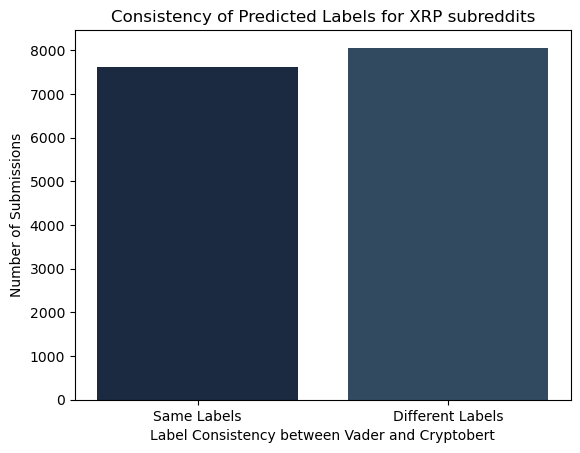

In [9]:
same_labels_count = sum(1 for label1, label2 in zip(vader_df['VADER_Sentiment'], cryptobert_df['label']) if label1 == label2)
different_labels_count = len(vader_df['VADER_Sentiment']) - same_labels_count

# Plotting
labels = ['Same Labels', 'Different Labels']
counts = [same_labels_count, different_labels_count]

plt.bar(labels, counts, color=['#1B2A41', '#324A5F'])
plt.xlabel('Label Consistency between Vader and Cryptobert')
plt.ylabel('Number of Submissions')
plt.title(f'Consistency of Predicted Labels for {c} subreddits')
plt.show()

In [10]:
print(same_labels_count,different_labels_count)

7630 8062


In [11]:
100 * different_labels_count/len(vader_df['VADER_Sentiment'])

51.37649757838389

In [12]:
# count = 0
for i, (text, label1, label2) in enumerate(zip(vader_df['selftext'], vader_df['VADER_Sentiment'], cryptobert_df['label'])):
    if label1 != label2:
        # if 'invite link' in text:
        #     continue
        print(f"Row {i+1}: Text: '{text}', VADER predicted label: '{label1}', Cryptobert predicted label: '{label2}'")
        # count+=1 


Row 1: Text: 'we provide over 100+ free crypto articles on our substack! :d (link on our profile). this is not financial advice. ' ' ' **tldr:** common goods are goods that are for everyone to use like parks, libraries, and oxygen. in the physical world, common goods are destroyed because no one has the incentive to take care of them. today in the defi world it can be different because we have an incentive to want to take care of them. participatory economics functions via a token-based ecosystem where the token is an incentive to affect people's behaviors and encourage them to do good in these public goods that we are creating. # what are common goods? **public goods:** there is a little bit more of a barrier here as you need to fit certain criteria to join this space like a country club where you need to get memberships or you need to have x amount of qualifications or x amount of attributes to be able to join this public goods community. **common goods:** on the other hand, common g

In [13]:
count

8060

In [14]:
different_labels_count

8062